In [1]:
import pandas as pd
from pyprojroot import here
from eda_utils import convert_date_to_timestamp, WpEDS

import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(24, 12)})
# SMALL_SIZE = 8
# MEDIUM_SIZE = 10
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

#### Read data, convert time, sort time-index

In [2]:
df_train = pd.read_csv(here("data/raw/train.csv"))
df_train = convert_date_to_timestamp(df_train)
print("train:", df_train.shape)

df_test = pd.read_csv(here("data/raw/test.csv"))
df_test = convert_date_to_timestamp(df_test)
print("test:", df_test.shape)

df_wf1 = pd.read_csv(here("data/raw/windforecasts_wf1.csv"))
df_wf1 = convert_date_to_timestamp(df_wf1)
print("wf1:",df_wf1.shape)

train: (18757, 7)
test: (7488, 1)
wf1: (104832, 5)


In [3]:
wp1 = WpEDS(df_train[["wp1"]].rename(columns={"wp1":"wp"}), df_wf1)

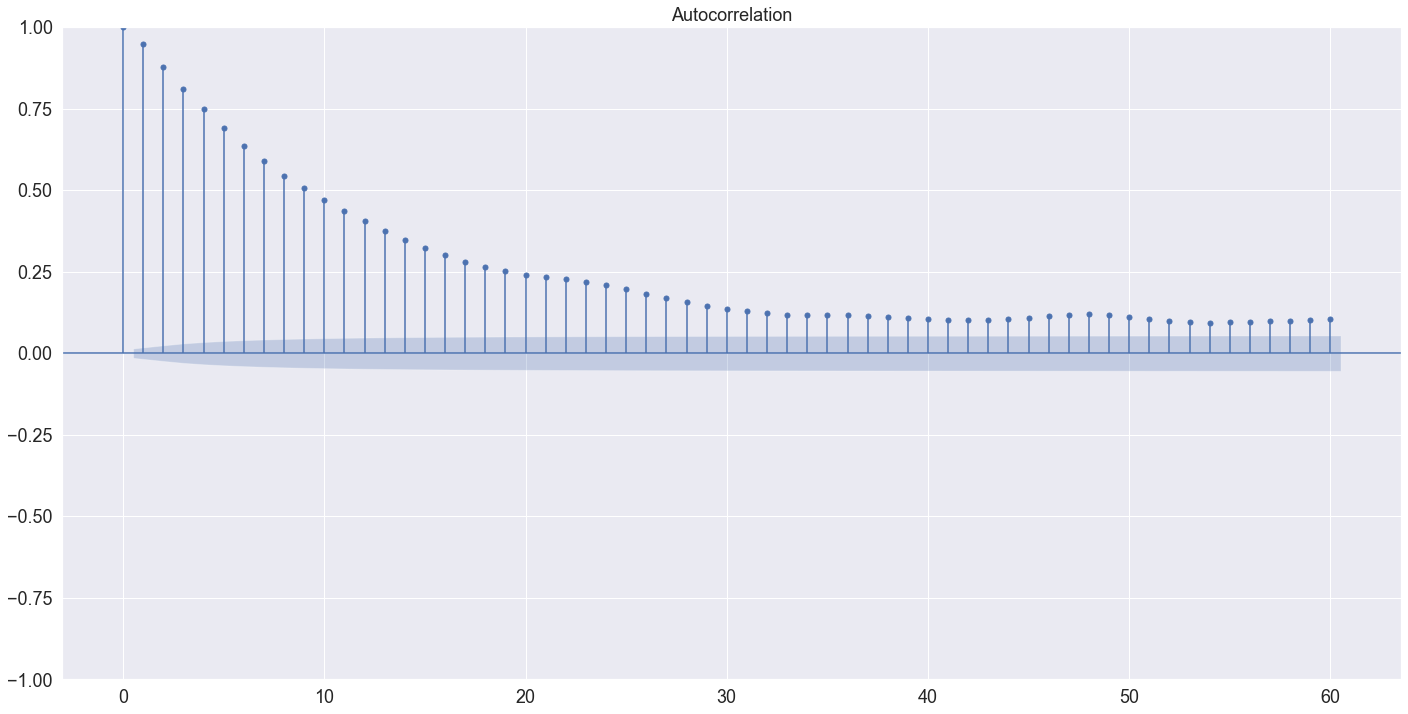

In [8]:
wp1.show_lag_plot(lag=60)

In [5]:
wp1.check_missing_values()

wp number of missing values: wp       0
year     0
month    0
day      0
hour     0
dtype: int64
ws number of missing values: hors         0
u        11160
v        11160
ws       11160
wd       11160
year         0
month        0
day          0
dtype: int64


In [6]:
wp1.statistics()

                 wp          year         month           day          hour
count  18757.000000  18757.000000  18757.000000  18757.000000  18757.000000
mean       0.252388   2010.159994      6.927174     15.722290     11.496188
std        0.246381      0.895025      3.424789      8.792962      6.922186
min        0.000000   2009.000000      1.000000      1.000000      0.000000
25%        0.050000   2010.000000      4.000000      8.000000      5.000000
50%        0.175000   2010.000000      7.000000     16.000000     11.000000
75%        0.381000   2011.000000     10.000000     23.000000     17.000000
max        0.947000   2012.000000     12.000000     31.000000     23.000000
                hors             u            v            ws            wd  \
count  104832.000000  93672.000000  93672.00000  93672.000000  93672.000000   
mean       24.500000      1.598712     -0.09969      4.072487    144.814262   
std        13.853465      3.052834      2.87600      1.889861     93.518468   


In [7]:
wp1.check_data_range()

WP first valid day: 2009-07-01 00:00:00 | WP last valid day: 2012-06-26 12:00:00
WS first valid day: 2009-07-01 00:00:00 | WS last valid day: 2012-06-26 12:00:00
WP shape: (18757, 5)
WS shape: (104832, 8)


<AxesSubplot:>

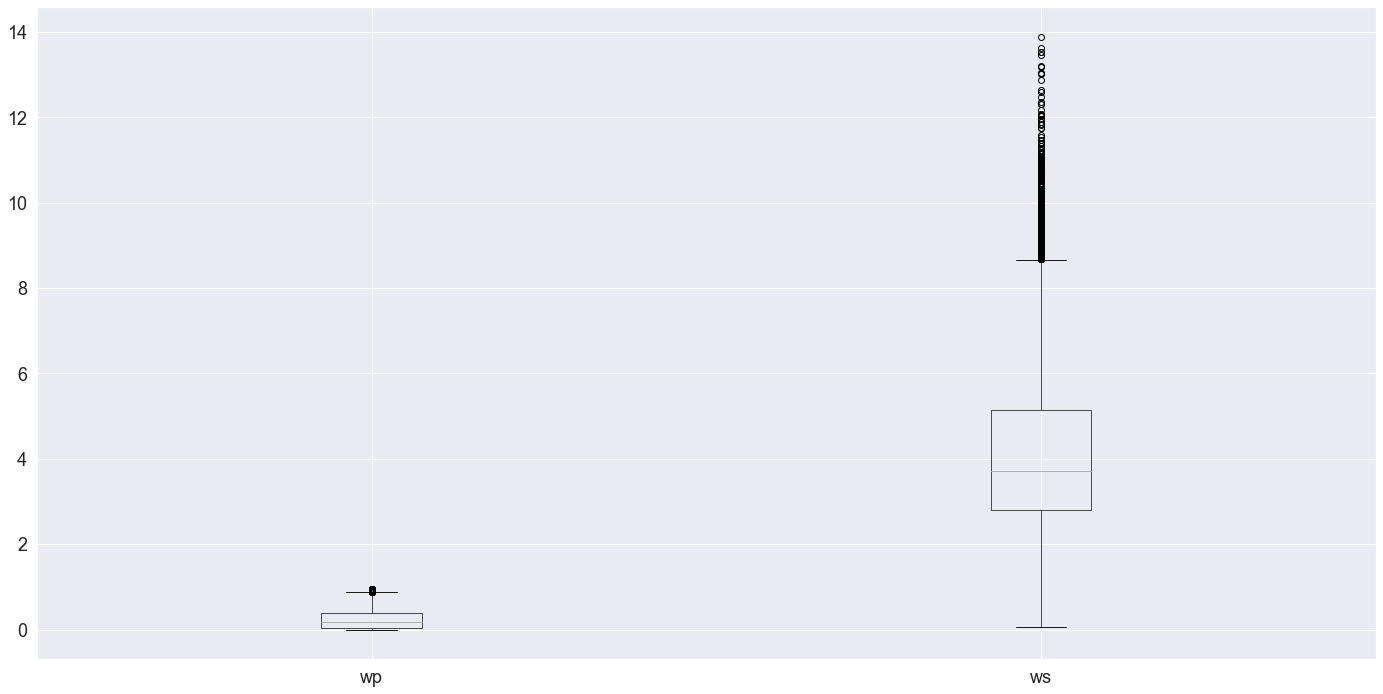

In [9]:
wp1.plot_boxplot()

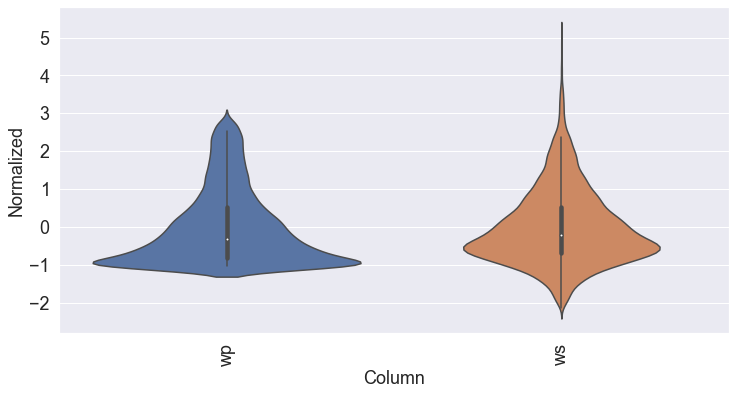

In [10]:
wp1.plot_violinplot()

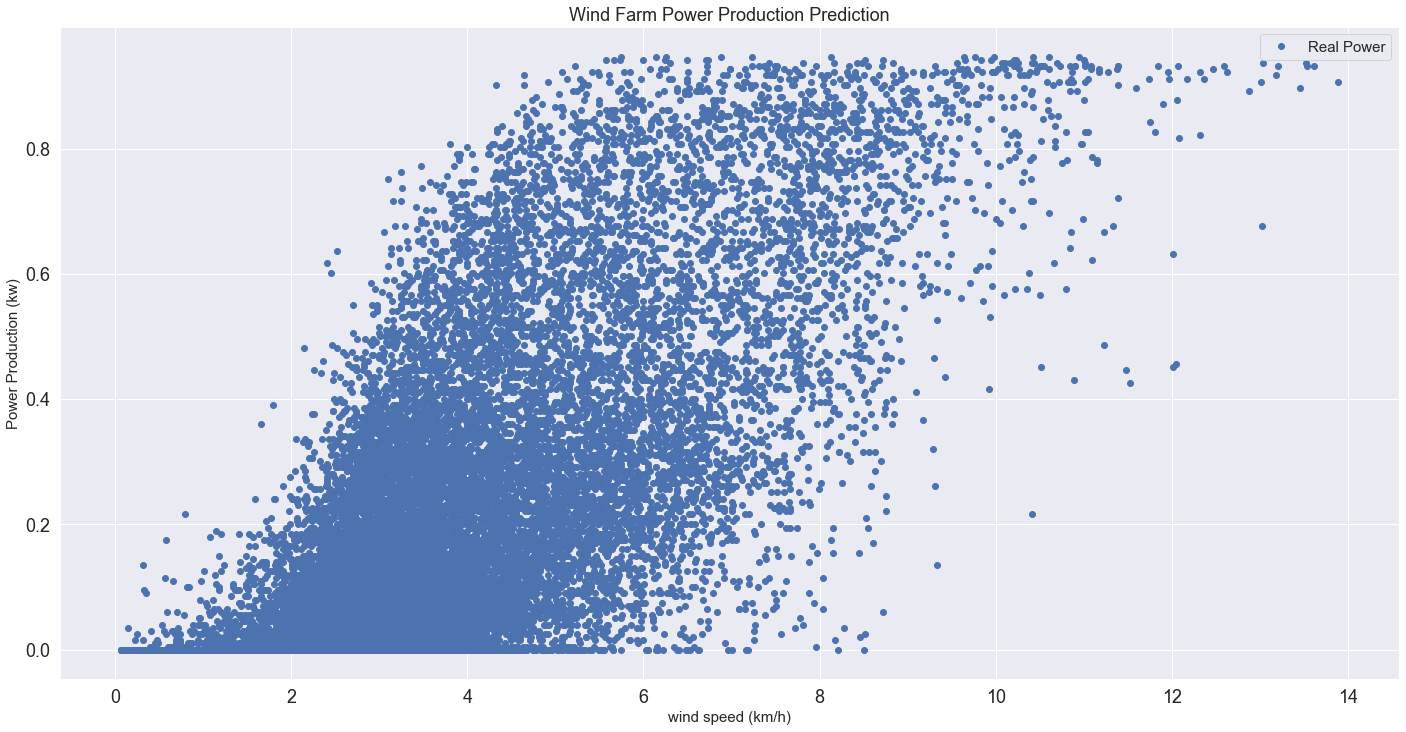

In [5]:
wp1.plot_wind_power_curve()

In [6]:
wp1.grangers_causation_matrix()

,wp_x,ws_x
wp_y,1.0,0.0
ws_y,0.0,1.0


Cointegration test helps to establish the presence of a statistically significant connection between two or more time series.

In [8]:
wp1.cointegration_test()

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
wp     ::  957.69    > 12.3212   =>   True
ws     ::  123.82    > 4.1296    =>   True


Check for Stationarity and Make the Time Series Stationary.

There is a suite of tests called unit-root tests. The popular ones are:

- Augmented Dickey-Fuller Test (ADF Test)
- KPSS test
- Philip-Perron test

Here I will use ADF to check if the data is stationary

In [7]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [5]:
wp1.data

,wp,ws
timestamp,,
2009-07-01 00:00:00,0.045,2.47
2009-07-01 01:00:00,0.085,2.40
2009-07-01 02:00:00,0.020,2.51
2009-07-01 03:00:00,0.060,2.73
2009-07-01 04:00:00,0.045,2.93
...,...,...
2012-06-26 08:00:00,0.170,2.46
2012-06-26 09:00:00,0.211,2.72
2012-06-26 10:00:00,0.251,3.11


In [6]:
for name, column in wp1.data.iteritems():
    WpEDS.adfuller_test(series=column, name=column.name)
    print("\n")

    Augmented Dickey-Fuller Test on "wp" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -16.3273
 No. Lags Chosen       = 33
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "ws" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -13.8855
 No. Lags Chosen       = 45
 Critical value 1%     = -3.431
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


